In [1]:
%config IPCompleter.greedy=True
%config Completer.use_jedi = False

In [63]:
from math import floor

import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
from scipy.stats import binom
import theano.tensor as tt

In [5]:
w = 6
N = 9

nIter = 2000
nChains = 4
nWarmup = floor(nIter/2)

In [90]:
with pm.Model() as model:
    theta = pm.Uniform('theta', 0, 1)
    
    W = pm.Bernoulli('W', theta, shape=N, testval=np.random.binomial(1, 0.5, N))
    
    det = pm.Deterministic('det', tt.sum(W) / float(N))

    globe = pm.Binomial('globe', N, det, observed=w)
    
    step = pm.Metropolis(vars=[theta])
    trace = pm.sample(nIter, step=step, return_inferencedata=False)
    burned_trace = trace[nWarmup:]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [theta]
>BinaryGibbsMetropolis: [W]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 35 seconds.
The number of effective samples is smaller than 25% for some parameters.


[]

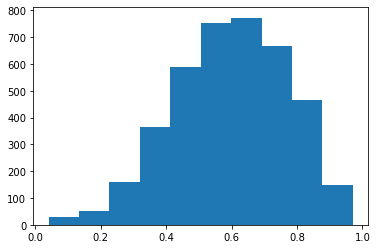

In [92]:
plt.hist(burned_trace['theta'])
plt.plot()

In [93]:
print(model)

theta_interval__ ~ TransformedDistribution
               W ~ Bernoulli
           theta ~ Uniform
             det ~ Deterministic
           globe ~ Binomial
